# 20210829 Initial Analysis

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2021_08_29 as redu
night = '20210829'
fld = 'Fld2'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Had an issue with stacking, the gfol

for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_I image 6 stars: 1623
key: LS_I image 7 stars: 2231
key: LS_I image 11 stars: 2963
key: LS_I image 15 stars: 3728
key: LS_I image 19 stars: 3649
key: LS_I image 23 stars: 3895
key: docz_I image 8 stars: 2272
key: docz_I image 12 stars: 3314
key: docz_I image 16 stars: 3568
key: docz_I image 20 stars: 3570
key: docz_I image 24 stars: 3873
key: open_I image 9 stars: 1238
key: open_I image 13 stars: 2129
key: open_I image 17 stars: 2174
key: open_I image 21 stars: 2141
key: open_I image 25 stars: 972
key: tt_I image 10 stars: 1666
key: tt_I image 14 stars: 2149
key: tt_I image 18 stars: 2481
key: tt_I image 22 stars: 2537
key: tt_I image 26 stars: 2468
key: LS_VBRI image 35 stars: 2156
key: LS_VBRI image 39 stars: 1712
key: LS_VBRI image 40 stars: 1861
key: LS_VBRI image 44 stars: 1867
key: docz_VBRI image 36 stars: 2021
key: docz_VBRI image 41 stars: 1806
key: docz_VBRI image 45 stars: 1996
key: open_VBRI image 37 stars: 1454
key: open_VBRI image 42 stars: 1460
key: open_VBRI ima

## Real time plots

In [4]:
redu.dict_images.keys()

dict_keys(['LS_I', 'docz_I', 'open_I', 'tt_I', 'LS_VBRI', 'docz_VBRI', 'open_VBRI', 'tt_VBRI', 'LS_RIVB', 'docz_RIVB', 'open_RIVB', 'tt_RIVB'])

In [5]:
# pick a file based on key
key = 'open_VBRI'
i=1
img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

#test_img_base = 'sta013LS_c_scan'

50% EE radius = 0.450"


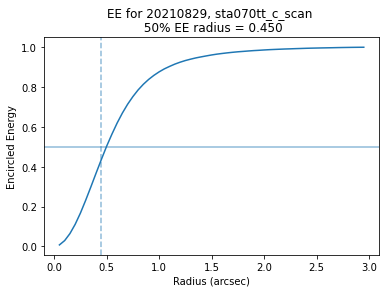

In [8]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

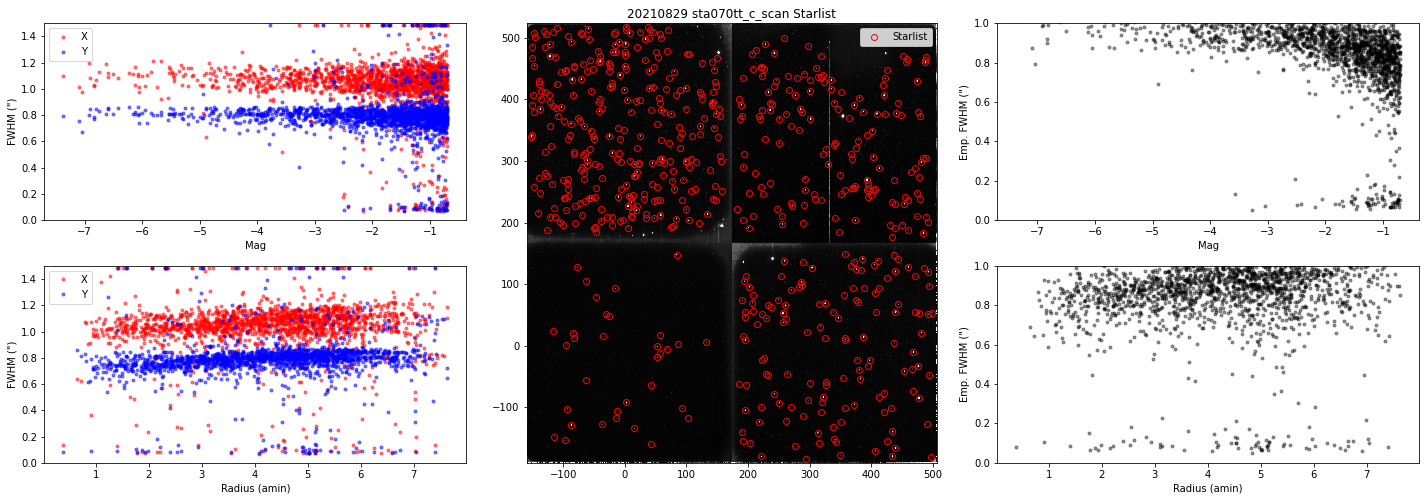

x: fwhm_x_avg = 1.06" fwhm_x_med = 1.06" fwhm_x_std = 0.08"
x: fwhm_x_avg = 1.06" fwhm_x_med = 1.06" fwhm_x_std = 0.08"


In [9]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

Play with a star list and look at trends in FWHM, etc. 

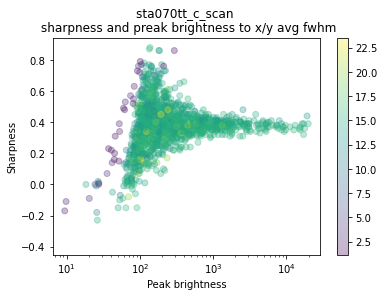

In [11]:
# num pix vs fwhm
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0), alpha=0.3)
#plt.xlim(100, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

# STATS

## Moffat stats

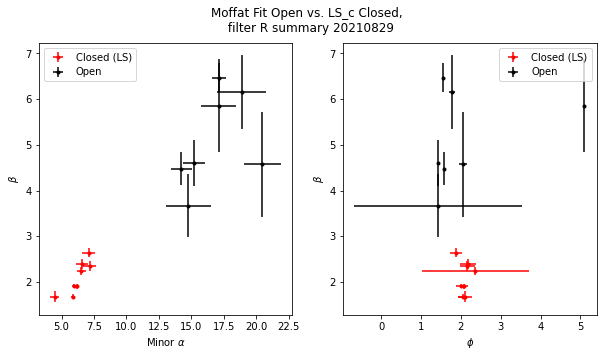

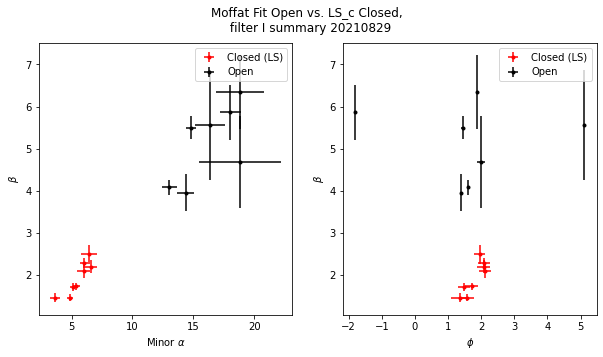

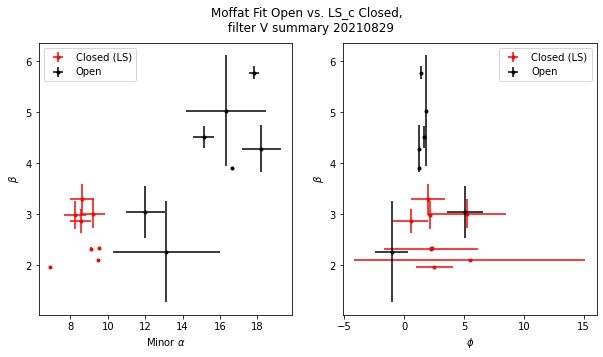

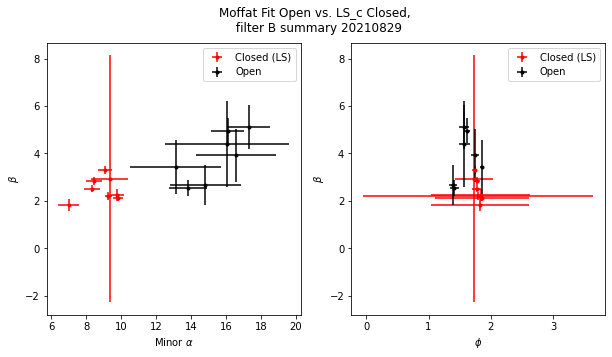

In [16]:
c_key = "LS_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

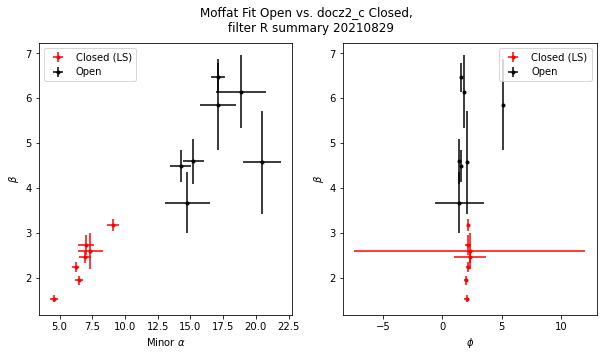

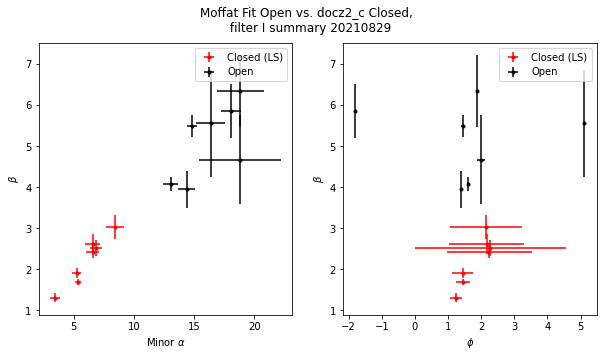

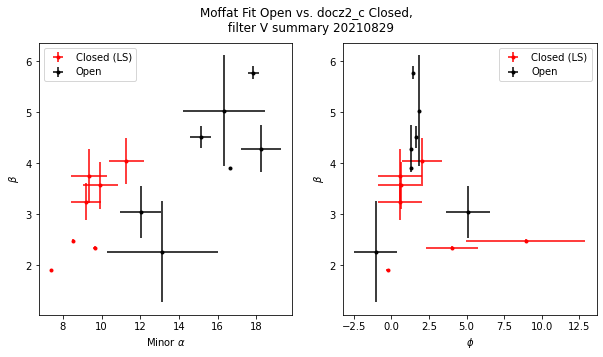

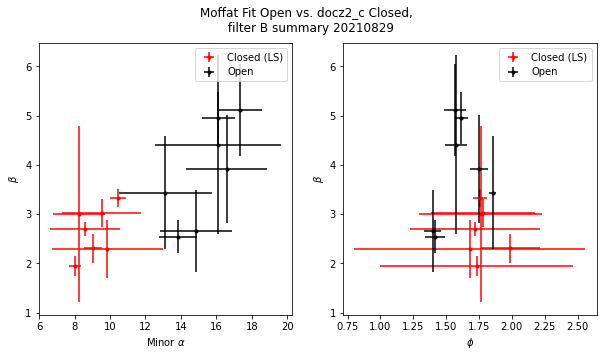

In [17]:
c_key = "docz2_c"
plot_redu.plot_moffat_fit_4F("R", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("I", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("V", root_dir, c_key, fld, night)
plot_redu.plot_moffat_fit_4F("B", root_dir, c_key, fld, night)

## Stat Stacking

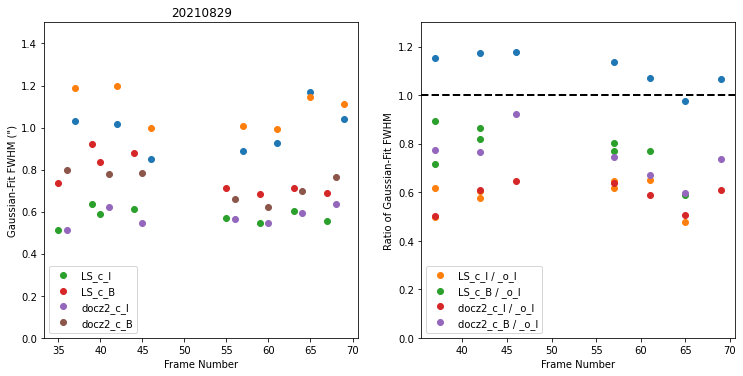

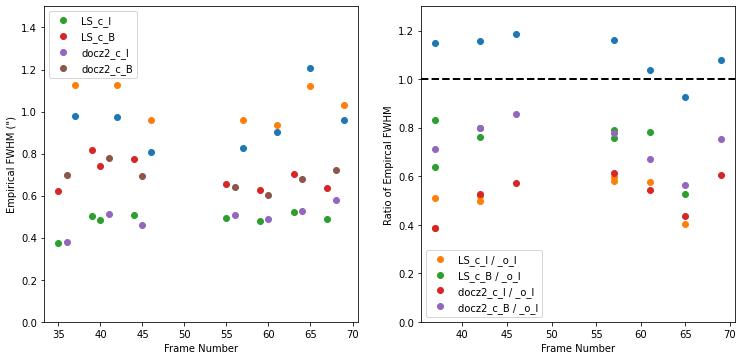

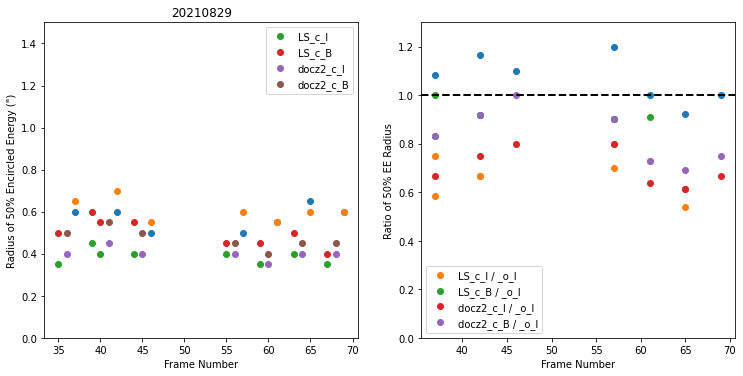

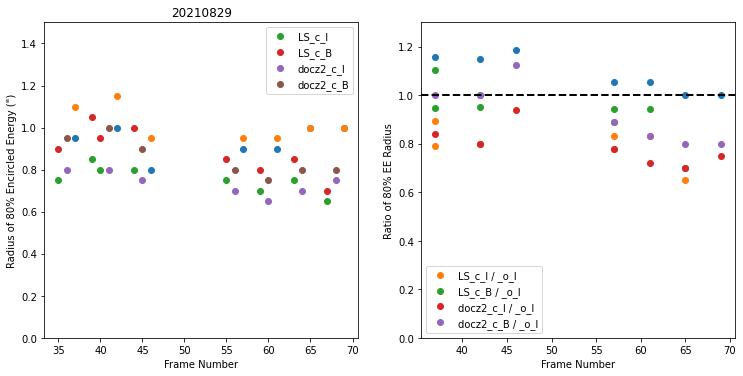

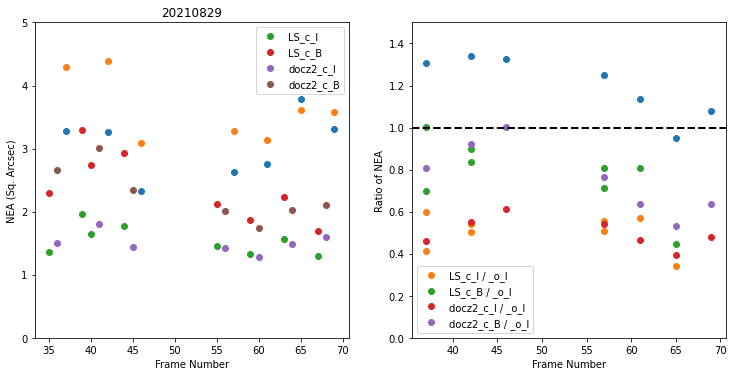

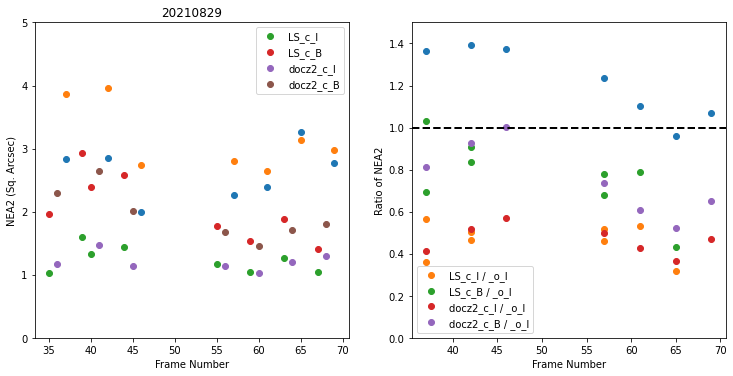

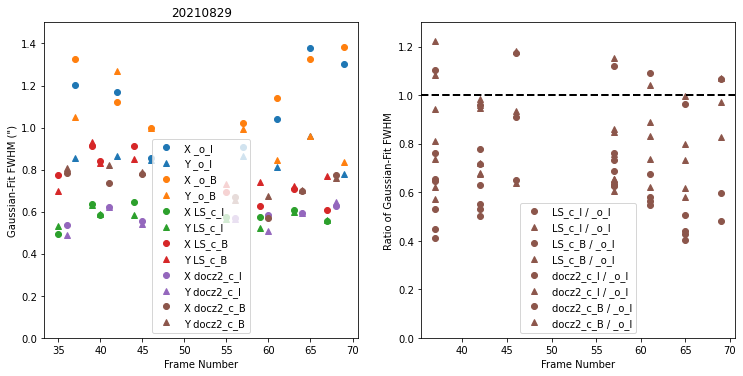

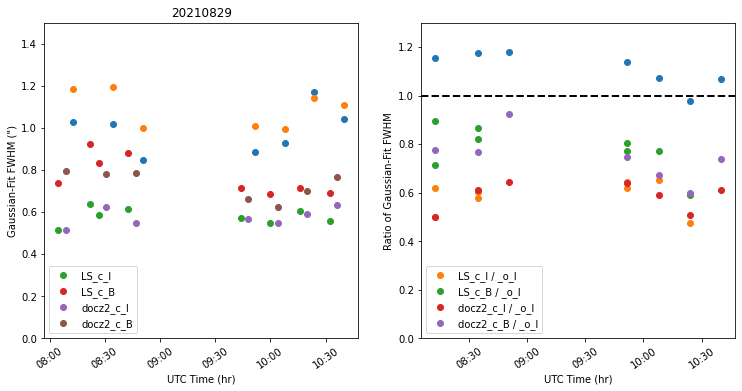

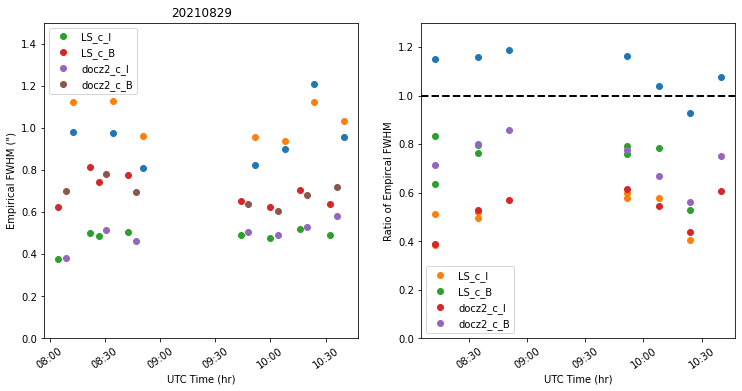

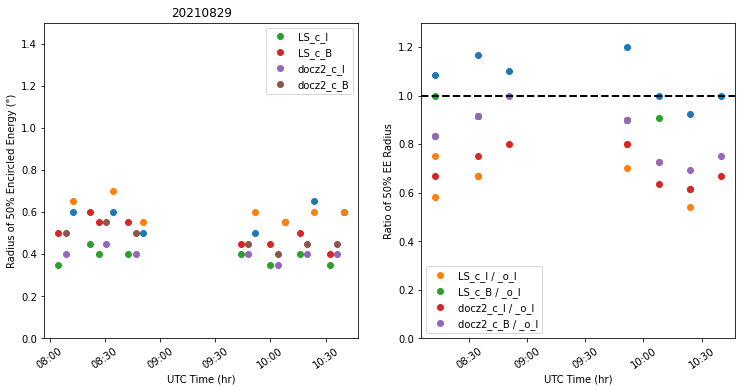

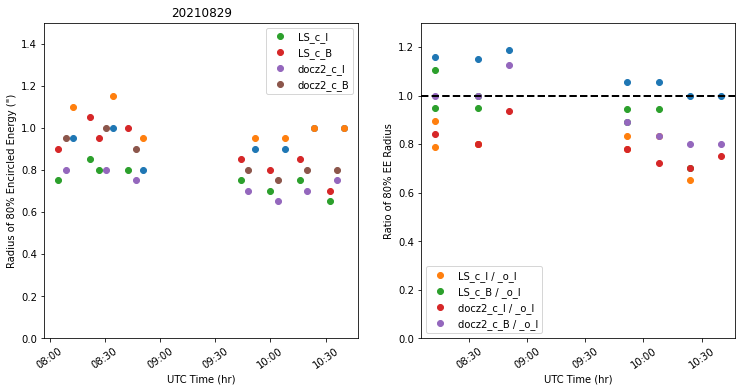

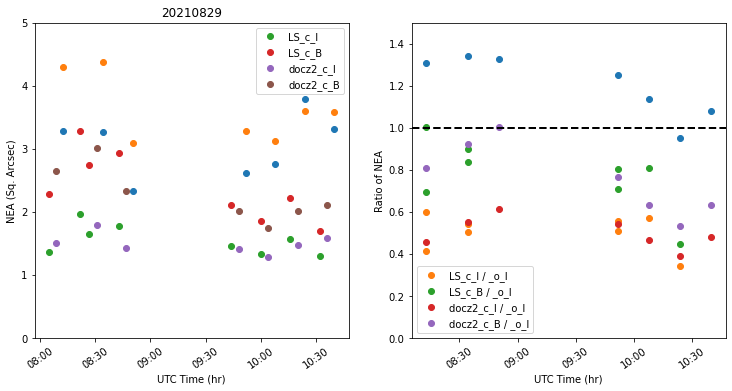

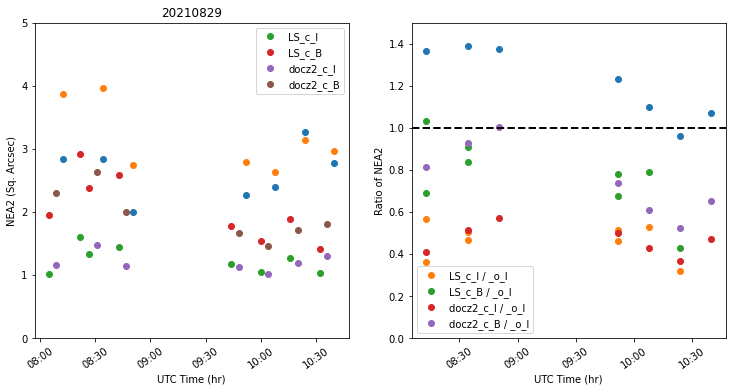

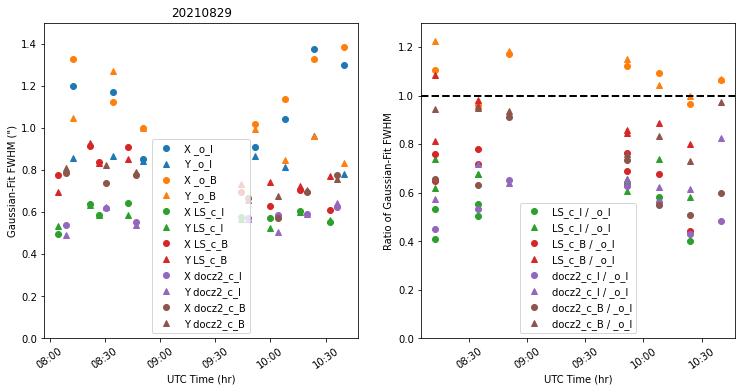

In [18]:
## Must have completed stats
suffixes = list(redu.dict_suffix.keys())
suffixes = ['_o_I', '_o_B', 'LS_c_I', 'LS_c_B', 'docz2_c_I', 'docz2_c_B']
plot_stats.plot_stack_stats(night, suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')
plt.show()

# Time Variation w/MASS-DIMM

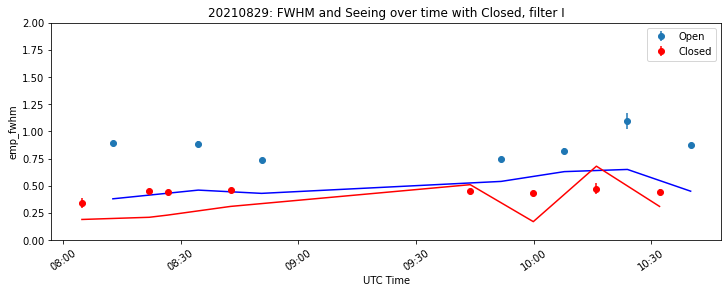

In [20]:
filt = "I"
wav = 806
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

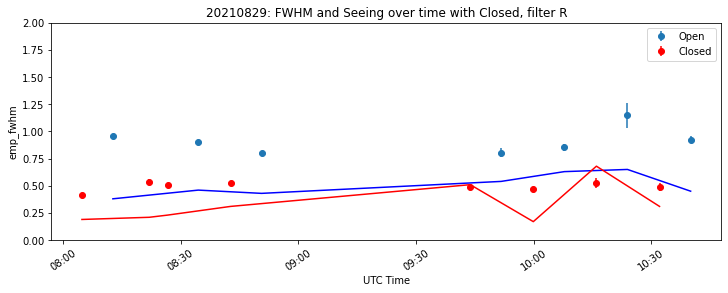

In [21]:
filt = "R"
wav = 658
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

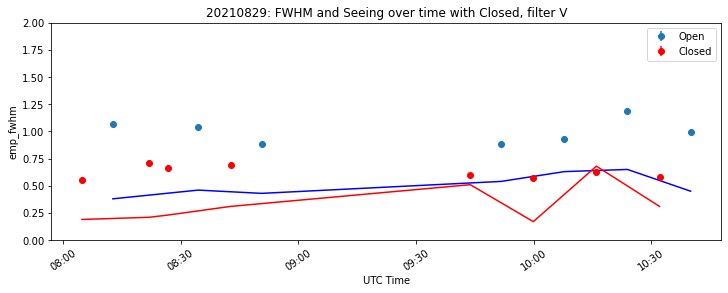

In [22]:
filt = "V"
wav = 551
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

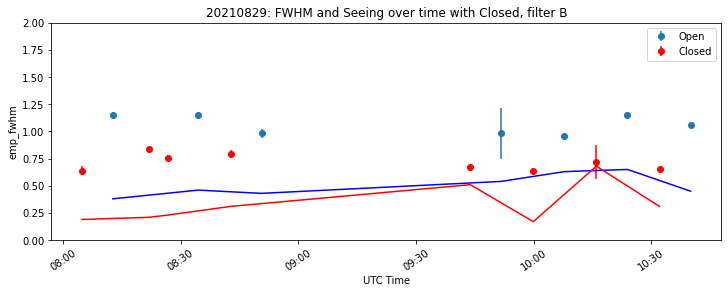

In [23]:
filt = "B"
wav = 445
open_file = f"{stats_dir}stats__o_{filt}_mdp.fits"
closed_file1 = f"{stats_dir}stats_LS_c_{filt}_mdp.fits"
plot_redu.plot_fwhmvt_nomatch_filt(open_file, closed_file1, 'emp_fwhm', f"{night}: FWHM and Seeing over time with Closed, filter {filt}", plots_dir, wav)

# Aggregate Plots

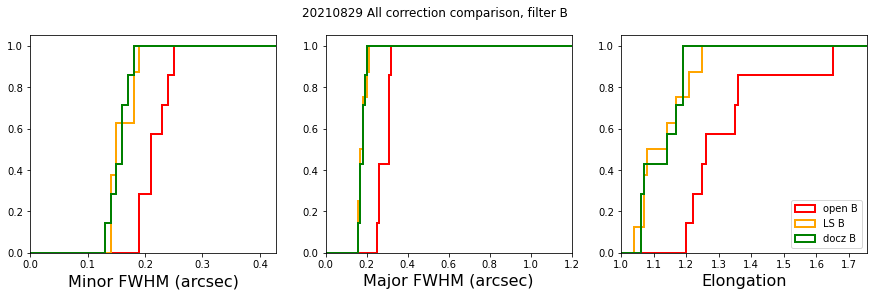

In [24]:
f_band = "B"

files = [f"{stats_dir}stats__o_{f_band}_mdp.fits", f"{stats_dir}stats_LS_c_{f_band}_mdp.fits", f"{stats_dir}stats_docz2_c_{f_band}_mdp.fits"]
labels = ['open '+ f_band, 'LS ' + f_band, 'docz ' + f_band]
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All correction comparison, filter {f_band}")
plt.show()

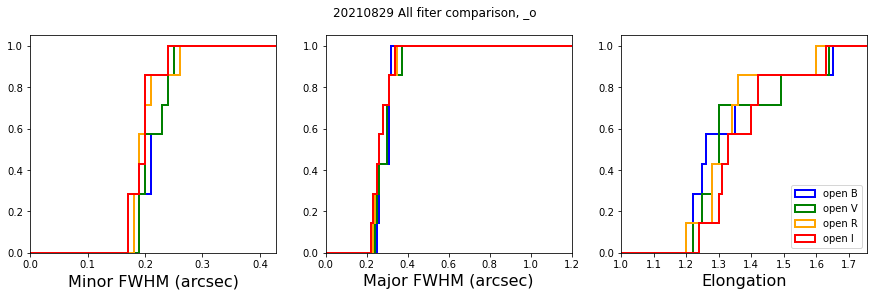

In [25]:
suff = "_o"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['open B', 'open V', 'open R', 'open I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

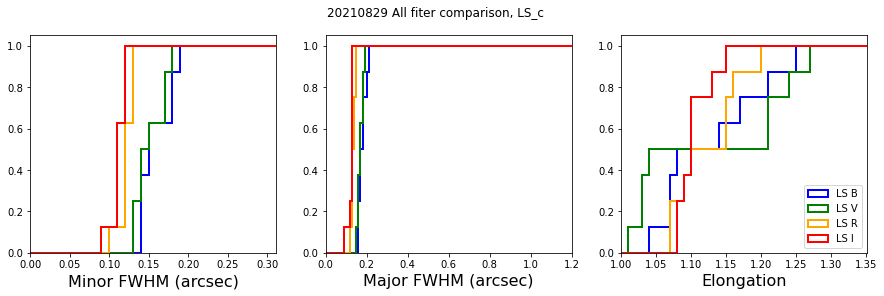

In [26]:
suff = "LS_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

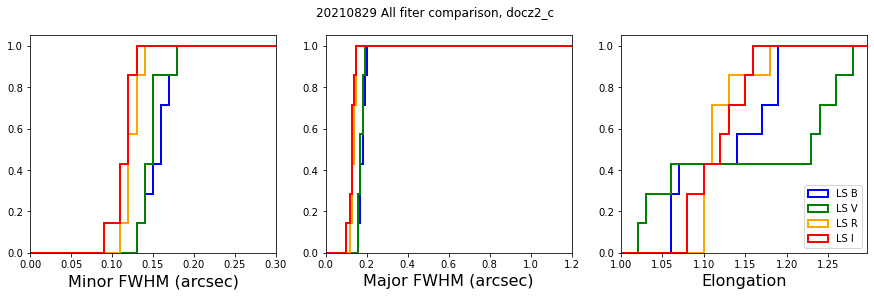

In [27]:
suff = "docz2_c"

files = [f"{stats_dir}stats_{suff}_B_mdp.fits", f"{stats_dir}stats_{suff}_V_mdp.fits", f"{stats_dir}stats_{suff}_R_mdp.fits",f"{stats_dir}stats_{suff}_I_mdp.fits"]
labels = ['LS B', 'LS V', 'LS R', 'LS I']
colors = ['blue', 'green', 'orange', 'red']
plot_stats.comp_cdf(files, labels, colors)
plt.suptitle(f"{night} All fiter comparison, {suff}")
plt.show()

# Four Filter Analysis

In [28]:
from imaka.analysis import fourfilt
root = stats_dir

files_c = [root+"stats_LS_c_B.fits", root+"stats_LS_c_V.fits", root+"stats_LS_c_R.fits", root+"stats_LS_c_I.fits"]
files_o = [root+"stats__o_B.fits", root+"stats__o_V.fits", root+"stats__o_R.fits", root+"stats__o_I.fits"]

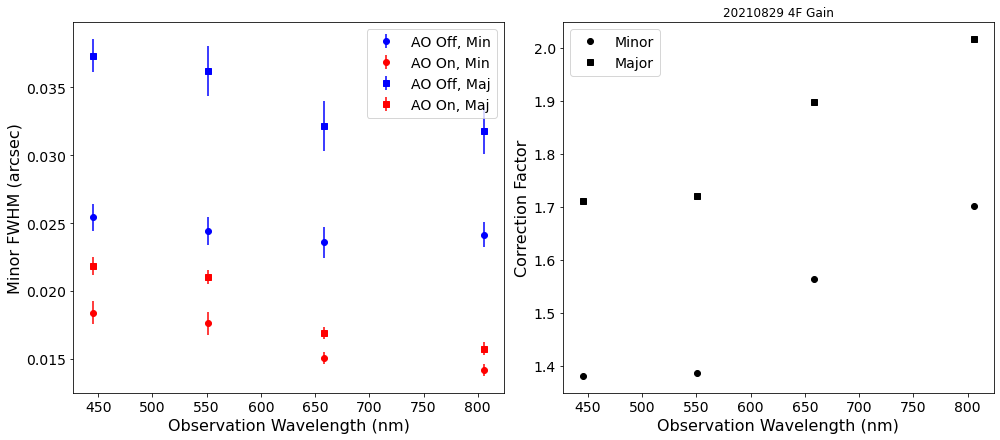

In [29]:
fourfilt.plot_gain(files_o, files_c) 
plt.title(f"{night} 4F Gain")
plt.show()

χ$^2$=0.6
χ$^2$=1.92
α=0.09
α=0.47


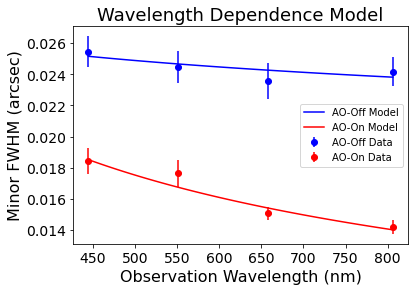

In [30]:
reload(fourfilt)
fourfilt.power_model(files_o, files_c)

# Field Variability

In [19]:
from importlib import reload
reload(plot_stats)

<module 'imaka.analysis.plot_stats' from '/u/eden/code/imaka/imaka/analysis/plot_stats.py'>

### Closed loop, single exposure

sta019LS_c_scan
Median FWHM           = 0.343"
Median FWHM (clipped) = 0.344"
Mean FWHM             = 0.449"
Mean FWHM (clipped)   = 0.353"
Stddev FWHM           = 2.675"
Stddev FWHM (clipped) = 0.057"


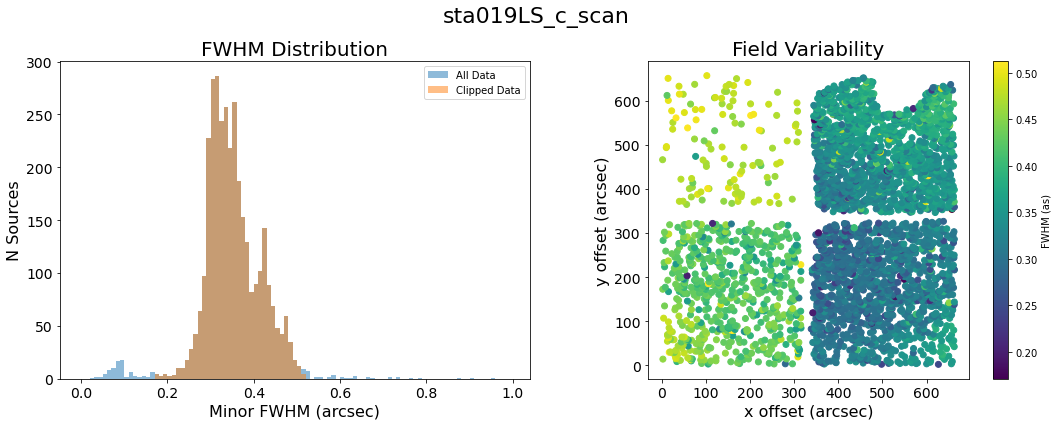

In [4]:
test_img_base = "sta019LS_c_scan"
print(test_img_base)
img_file = root_dir + 'reduce/Fld2/' + test_img_base + '_clean.fits'
starlist = root_dir + 'reduce/Fld2/' + test_img_base + '_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, test_img_base)

### Open Loop

In [34]:
filt = 'IVBR'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop stack, {filt}")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210829/sta/reduce/stacks/fld2_stack__o_IVBR.fits'

In [35]:
filt = 'VBRI'
img_file = stack_dir + f'fld2_stack__o_{filt}.fits' 
starlist = stack_dir + f'fld2_stack__o_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Open Loop Stack, {filt}")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20210829/sta/reduce/stacks/fld2_stack__o_VBRI.fits'

### Closed (LS)

Median FWHM           = 0.338"
Median FWHM (clipped) = 0.336"
Mean FWHM             = 3053799083.815"
Mean FWHM (clipped)   = 0.589"
Stddev FWHM           = 347534255128.989"
Stddev FWHM (clipped) = 0.937"


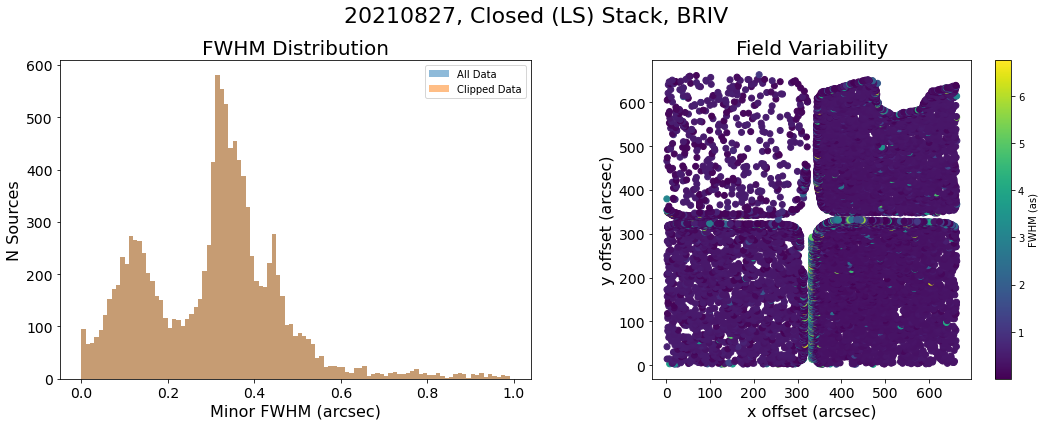

In [11]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

Median FWHM           = 0.399"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 42.446"
Mean FWHM (clipped)   = 0.390"
Stddev FWHM           = 3266.569"
Stddev FWHM (clipped) = 0.114"


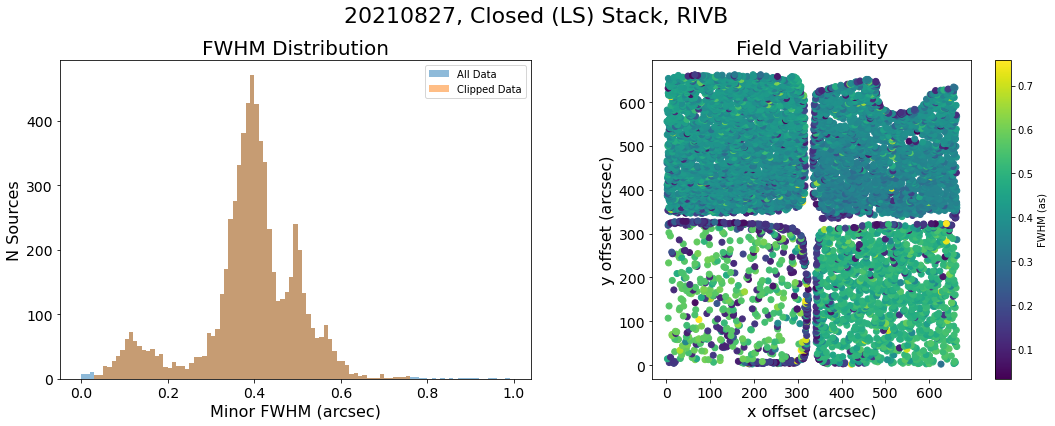

In [8]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_LS_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_LS_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (LS) Stack, {filt}")

### Closed (docz)

Median FWHM           = 0.345"
Median FWHM (clipped) = 0.341"
Mean FWHM             = 1425541024722.534"
Mean FWHM (clipped)   = 0.434"
Stddev FWHM           = 149410029198265.219"
Stddev FWHM (clipped) = 0.491"


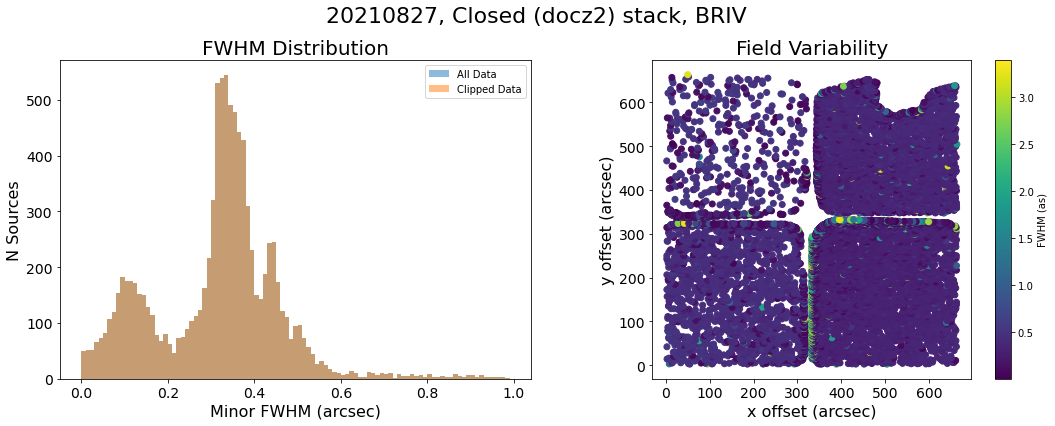

In [9]:
filt = 'BRIV'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

Median FWHM           = 0.400"
Median FWHM (clipped) = 0.398"
Mean FWHM             = 0.712"
Mean FWHM (clipped)   = 0.397"
Stddev FWHM           = 11.580"
Stddev FWHM (clipped) = 0.106"


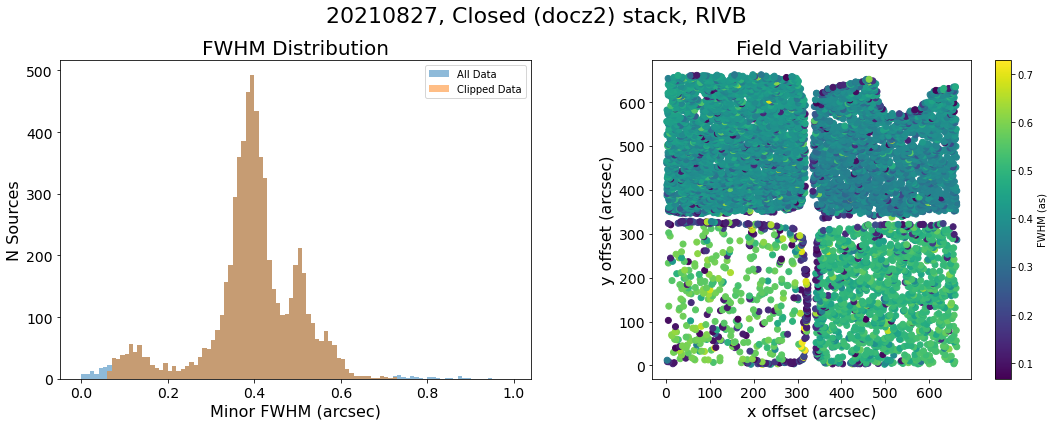

In [10]:
filt = 'RIVB'
img_file = stack_dir + f'fld2_stack_docz2_c_{filt}.fits' 
starlist = stack_dir + f'fld2_stack_docz2_c_{filt}_stars_stats_mdp.fits' 
plot_stats.plot_var(img_file, starlist, f"{night}, Closed (docz2) stack, {filt}")

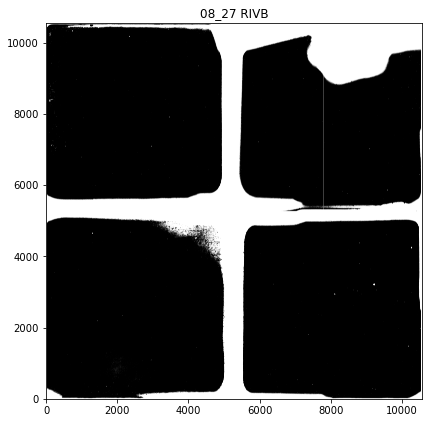

In [16]:
## What masks are we using? how are they different between orientations?
mask_dir = root_dir + "reduce/calib/"

hdul = fits.open(mask_dir +  "mask_RIVB.fits")

data = hdul[0].data

fig = plt.figure(figsize=(6,6))
plt.title("08_27 RIVB")
im = plt.imshow(data, origin ='lower', cmap='gray')
plt.tight_layout()
plt.show()
hdul.close()